## Imports

In [3]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TODO get interactive plotting working in jupyterlab
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

from interval import interval, inf, imath

from safe_train import *

## CIFAR example

In [3]:
# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

In [101]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [102]:
# model.name

## OLS example

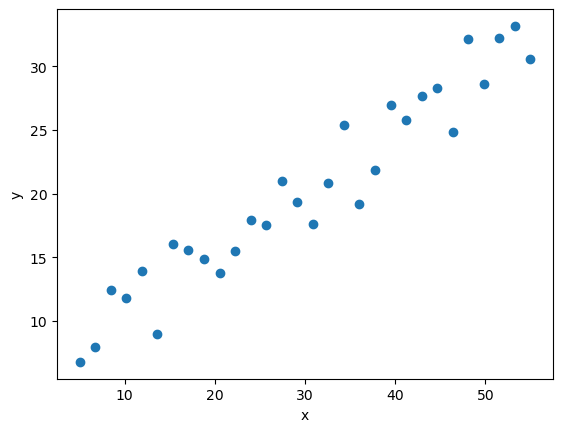

In [433]:
x, y = generate_data()
plt.figure()
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [360]:
# # TODO add more datapoints

# # x = np.array([5, 15, 25, 35, 45, 55])
# NOISE_STD = 2
# M = 0.5
# B = 5
# x = np.linspace(5, 55, 30)
# y_func = lambda x: M * x + B 
# y_noisy = lambda x: y_func(x) + np.random.normal(0, NOISE_STD, np.shape(x))
# # y = np.array([5, 20, 14, 32, 22, 38])
# y = y_noisy(x)

# plt.figure()
# plt.scatter(x,y)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [434]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(x)

2023-04-06 23:25:53.879045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 23:25:53.892119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [435]:
normalizer.mean.numpy()

array([30.000002], dtype=float32)

In [436]:
normalizer.variance.numpy()

array([222.70117], dtype=float32)

In [364]:
regression_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1),
    layers.Dense(units=10),
    layers.Dense(units=1),
])

In [365]:
regression_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 36
Trainable params: 33
Non-trainable params: 3
_________________________________________________________________


In [366]:
regression_model.predict(x)

1/1 [==============================] - 0s 168ms/step


2023-04-06 14:27:52.683600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-1.1011231 ],
       [-1.0251833 ],
       [-0.949244  ],
       [-0.8733043 ],
       [-0.797365  ],
       [-0.7214254 ],
       [-0.6454859 ],
       [-0.5695464 ],
       [-0.4936068 ],
       [-0.41766745],
       [-0.34172788],
       [-0.26578838],
       [-0.18984884],
       [-0.11390933],
       [-0.03796981],
       [ 0.03796963],
       [ 0.11390925],
       [ 0.18984869],
       [ 0.2657881 ],
       [ 0.34172767],
       [ 0.41766715],
       [ 0.49360675],
       [ 0.5695462 ],
       [ 0.6454858 ],
       [ 0.7214253 ],
       [ 0.79736465],
       [ 0.8733043 ],
       [ 0.9492437 ],
       [ 1.0251833 ],
       [ 1.1011229 ]], dtype=float32)

### Training

In [367]:
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

In [37]:
%%time
history = regression_model.fit(
    x,
    y,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

2023-05-09 14:29:42.443500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-09 14:29:42.661194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.

KeyboardInterrupt



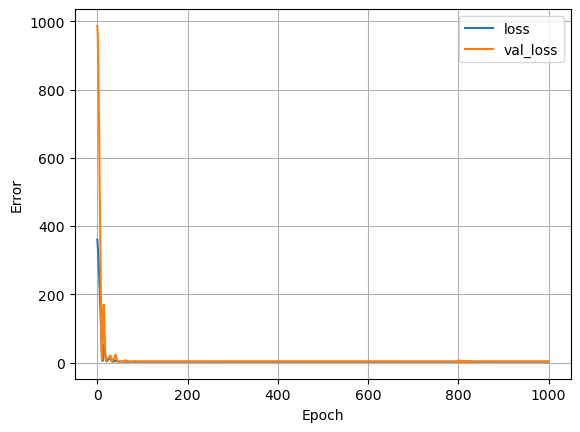

In [369]:
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

In [370]:
ys = regression_model.predict(x)
ys

1/1 [==============================] - 0s 55ms/step


2023-04-06 14:28:35.511757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 6.353011 ],
       [ 7.3323555],
       [ 8.311697 ],
       [ 9.29104  ],
       [10.270383 ],
       [11.249725 ],
       [12.229069 ],
       [13.208411 ],
       [14.187755 ],
       [15.167096 ],
       [16.146439 ],
       [17.125782 ],
       [18.105127 ],
       [19.084469 ],
       [20.063812 ],
       [21.043156 ],
       [22.0225   ],
       [23.00184  ],
       [23.981186 ],
       [24.960526 ],
       [25.939869 ],
       [26.919214 ],
       [27.898558 ],
       [28.877901 ],
       [29.857243 ],
       [30.836582 ],
       [31.815928 ],
       [32.79527  ],
       [33.774612 ],
       [34.753956 ]], dtype=float32)

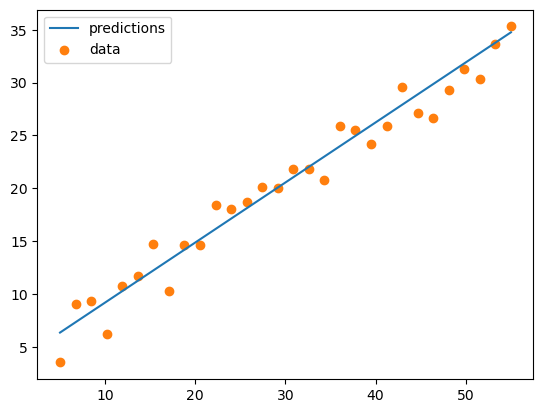

In [371]:
plt.figure()
plt.plot(x, ys)
plt.scatter(x, y, color="C1")
plt.legend(["predictions", "data"])
plt.show()

In [372]:
popt, pcov = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1*x, x, y)
popt

array([3.86520803, 0.54816637])

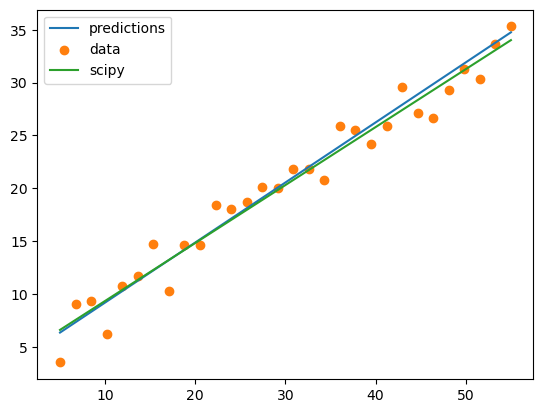

In [373]:
y_scipy = x * popt[1] + popt[0]
plt.figure()
plt.plot(x, ys)
plt.scatter(x, y, color="C1")
plt.plot(x, y_scipy, color="C2")
plt.legend(["predictions", "data", "scipy"])
plt.show()

## With functions:

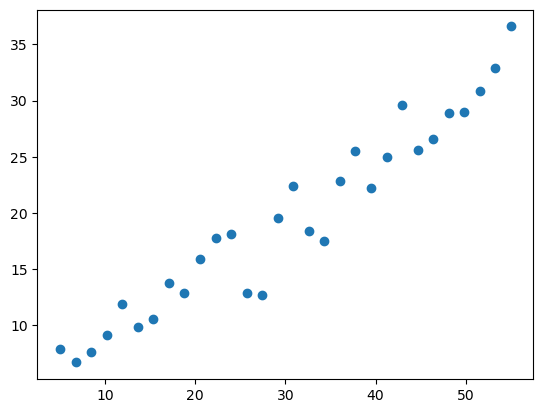

In [2]:
x, y = generate_data()
plt.figure()
plt.scatter(x, y)
plt.show()

2023-05-18 21:10:43.622803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-18 21:10:43.635889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-18 21:10:43.804124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-18 21:10:43.921210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


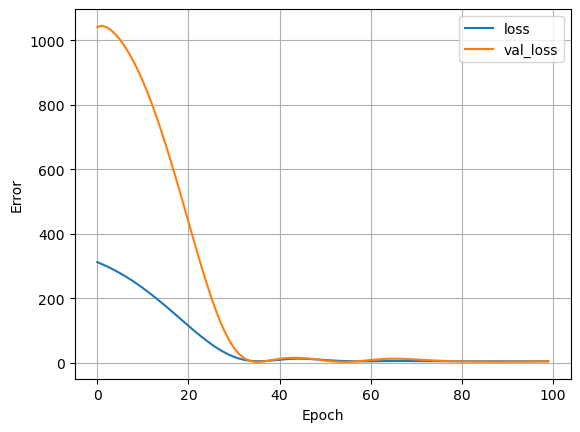

In [26]:
model, history = train_single_node_nn(x, y)
plot_loss(history)

1/1 [==============================] - 0s 44ms/step


2023-05-18 20:49:56.840886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


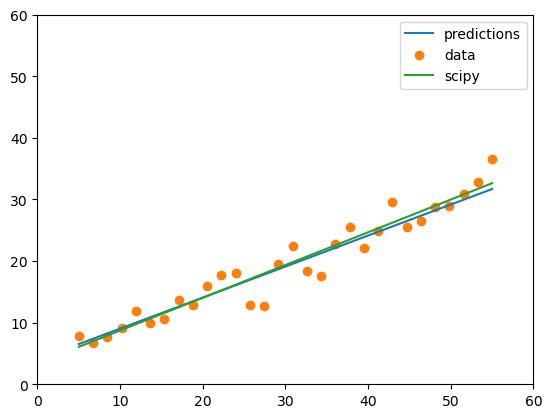

In [4]:
plot_predictions(model, x, y, [0, 60], [0, 60])

In [5]:
# neural network values
y_predict = model.predict(x)
# scipy values
popt, _ = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1 * x, x, y)
y_scipy = x * popt[1] + popt[0]

1/1 [==============================] - 0s 10ms/step


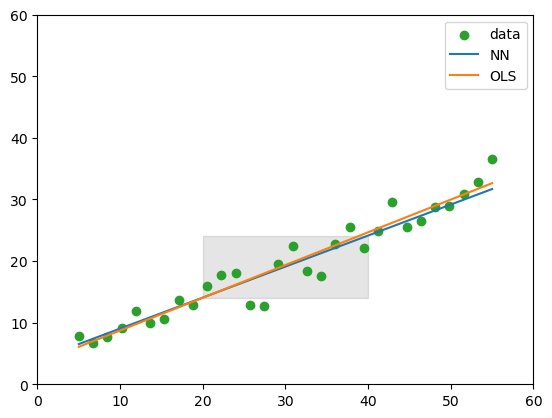

In [6]:
input_interval = interval[20, 40]
output_interval, _ = propagate_interval(input_interval, model)
plot_intervals(input_interval, output_interval, x, y, y_predict, y_scipy)

In [7]:
output_interval[0][0].sup

24.145246078318806

## Safe version

2023-05-18 21:31:44.746698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-18 21:31:44.759099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


safe region test FAILED, interval was interval([25.499147810041904, 51.09829846769571])
[<tf.Variable 'dense_39/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.2799575]], dtype=float32)>, <tf.Variable 'dense_39/bias:0' shape=(1,) dtype=float32, numpy=array([-0.10000285], dtype=float32)>]
safe region test FAILED, interval was interval([23.413094848394394, 47.02547964453697])
[<tf.Variable 'dense_39/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1806192]], dtype=float32)>, <tf.Variable 'dense_39/bias:0' shape=(1,) dtype=float32, numpy=array([-0.19928995], dtype=float32)>]
safe region test FAILED, interval was interval([21.354153513908386, 43.00548589229584])
[<tf.Variable 'dense_39/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0825666]], dtype=float32)>, <tf.Variable 'dense_39/bias:0' shape=(1,) dtype=float32, numpy=array([-0.29717886], dtype=float32)>]
safe region test FAILED, interval was interval([19.339232712984085, 39.07124188542366])
[<tf.Variable 'dense_39/ker

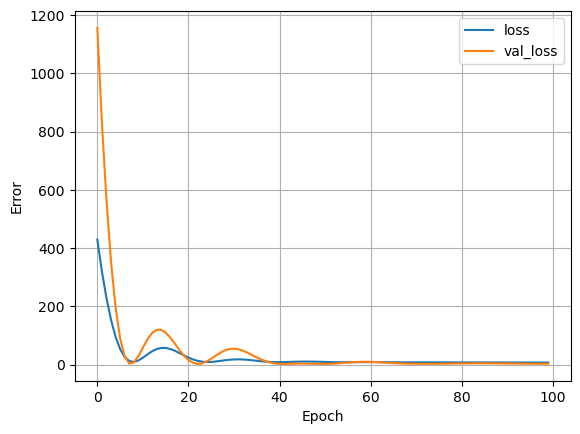

In [71]:
model, history = train_safe_single_node_nn(x, y)
plot_loss(history)

In [70]:
[layer.get_config()["name"] for layer in model.layers]

['input_18', 'normalization_19', 'dense_38', 'dense_37']

In [53]:
x.shape

(30,)

In [61]:
model.predict(x)

1/1 [==============================] - 0s 11ms/step


array([[ 6.509815 ],
       [ 7.3775177],
       [ 8.245217 ],
       [ 9.11292  ],
       [ 9.98062  ],
       [10.848322 ],
       [11.716023 ],
       [12.583725 ],
       [13.4514265],
       [14.319126 ],
       [15.186828 ],
       [16.05453  ],
       [16.922232 ],
       [17.789932 ],
       [18.657633 ],
       [19.525333 ],
       [20.393034 ],
       [21.260736 ],
       [22.128435 ],
       [22.996138 ],
       [23.86384  ],
       [24.73154  ],
       [25.599241 ],
       [26.466944 ],
       [27.334644 ],
       [28.202343 ],
       [29.070047 ],
       [29.937746 ],
       [30.80545  ],
       [31.673151 ]], dtype=float32)

1/1 [==============================] - 0s 12ms/step


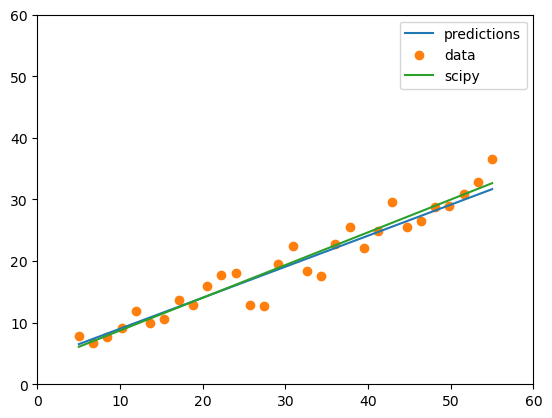

In [62]:
plot_predictions(model, x, y, [0, 60], [0, 60])

1/1 [==============================] - 0s 11ms/step


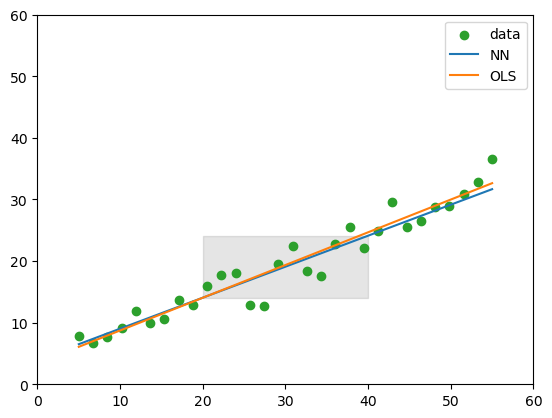

In [63]:
# neural network values
y_predict = model.predict(x)
# scipy values
popt, _ = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1 * x, x, y)
y_scipy = x * popt[1] + popt[0]

input_interval = interval[20, 40]
output_interval, _ = propagate_interval(input_interval, model)
plot_intervals(input_interval, output_interval, x, y, y_predict, y_scipy)

In [64]:
output_interval[0] in interval[10, 30]

True

In [65]:
input_interval * 0.5 + 5

interval([15.0, 25.0])

## Projection experiments

In [119]:
# output_interval = interval[9.711857616901398, 19.23788982629776]
weight = 0.4763016
bias= 0.18582541
input_interval = interval[20, 40]
input_interval * weight + bias

# goal interval: [10, 30]

interval([9.71185741, 19.23788941])

## Custom loop: tiny network

In [7]:
model = safe_training_loop()

2023-06-22 14:53:05.975525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-22 14:53:05.989623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Start of epoch 0
safe region test FAILED, interval was interval([18.33298436552286, 36.76596871763468])
[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9216492]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-0.09999999], dtype=float32)>]

Start of epoch 1
safe region test FAILED, interval was interval([16.261545941233635, 32.720745131373405])
[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.82295996]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-0.19765325], dtype=float32)>]

Start of epoch 2
safe region test passed, interval was interval([14.251788258552551, 28.79323422908783])

Start of epoch 3
safe region test passed, interval was interval([12.352274239063263, 25.07511216402054])

Start of epoch 4
safe region test passed, interval was interval([10.628067910671234, 21.689092576503754])

Start of epoch 5
safe region test FAILED, interval was in

In [8]:
model.get_weights()

[array([[0.5152622]], dtype=float32), array([1.1607208], dtype=float32)]

## Custom loop: quadratic, 64x3 nn

In [118]:
safe_training_loop_large_network()

2023-06-06 14:50:08.176829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-06 14:50:08.188923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Start of epoch 0
safe region test FAILED, interval was interval([3.507748066559332, 8.229931463254735])

Start of epoch 1
safe region test passed, interval was interval([33.09032688319947, 51.833776216988824])

Start of epoch 2
safe region test passed, interval was interval([44.23737606142403, 63.10064879586718])

Start of epoch 3
safe region test passed, interval was interval([16.639538404760735, 22.99917466618561])

Start of epoch 4
safe region test FAILED, interval was interval([9.08461638015407, 12.477438214469528])

Start of epoch 5
safe region test FAILED, interval was interval([7.088237916310565, 9.884547252235594])

Start of epoch 6
safe region test FAILED, interval was interval([7.357895064764641, 10.003559805863542])

Start of epoch 7
safe region test FAILED, interval was interval([9.06728367288229, 12.036206916117031])

Start of epoch 8
safe region test FAILED, interval was interval([12.680077987353748, 16.557488958806413])

Start of epoch 9
safe region test passed, interva

## Viewing weights

In [199]:
for layer in regression_model.layers: print(layer.get_config()); print(layer.get_weights())

{'name': 'normalization_5', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'axis': (), 'mean': None, 'variance': None}
[30.000002, 222.70117, 30]
{'name': 'dense_8', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[1.3976517]], dtype=float32), array([1.6543617], dtype=float32)]
{'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'units': 2, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bia

## Interval arithmetic

In [261]:
input_interval = interval[10, 40]
input_interval

interval([10.0, 40.0])

In [279]:
norm_interval = (input_interval - norm_mean) / norm_std
norm_interval

interval([-1.3401974324779955, 0.6700985245222355])

In [288]:
weight, bias = model.layers[1].get_weights()
output_interval = weight[0, 0] * norm_interval + bias[0]
output_interval

array([[1.2399263 , 5.45611963]])

In [266]:
weight2, bias2 = model.layers[2].get_weights()
output_interval *= weight2
output_interval += bias2

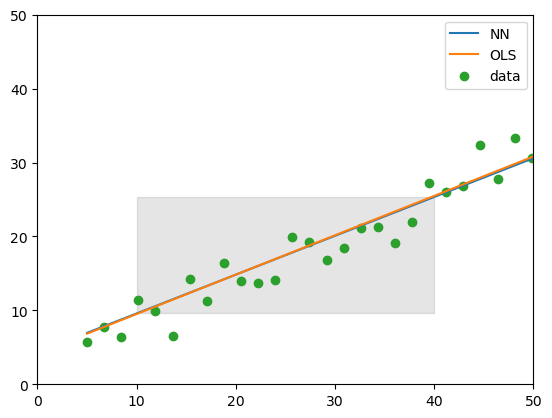

In [130]:
fig = plt.figure()
ax = fig.gca()

input_width = input_interval[0].sup - input_interval[0].inf
output_width = output_interval[0][1] - output_interval[0][0]
interval_rect = matplotlib.patches.Rectangle((input_interval[0].inf, output_interval[0][0]), input_width, output_width)
ax.add_collection(matplotlib.collections.PatchCollection([interval_rect], facecolor='k', alpha=0.1, edgecolor='k'))
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

plt.plot(x, ys)
plt.plot(x, y_scipy, color="C1")
plt.scatter(x, y, color="C2")
plt.legend(["NN", "OLS", "data"])
plt.show()

In [97]:
# import tensorflow as tf
# from tensorflow.keras.optimizers.legacy import Adam

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# # Instantiate legacy Adam optimizer
# model.compile(optimizer=Adam(), loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)


Epoch 1/5


2023-04-02 19:15:13.930749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 69s 83ms/step - loss: 4.8316 - accuracy: 0.0631
Epoch 2/5
782/782 [==============================] - 62s 79ms/step - loss: 4.2200 - accuracy: 0.1010
Epoch 3/5
782/782 [==============================] - 62s 79ms/step - loss: 3.9156 - accuracy: 0.1314
Epoch 4/5
782/782 [==============================] - 62s 79ms/step - loss: 3.5639 - accuracy: 0.1886
Epoch 5/5
782/782 [==============================] - 63s 80ms/step - loss: 3.6209 - accuracy: 0.1895


## Multi-node

In [374]:
input_interval = interval[10, 40]
input_interval

interval([10.0, 40.0])

In [375]:
# testing with utility
propagate_interval(input_interval, regression_model)

[interval([6.005117461103091, 29.421660062525902])]

In [376]:
norm_mean, norm_var, norm_n = regression_model.layers[0].get_weights()
norm_std = np.sqrt(norm_var)

In [377]:
norm_interval = (input_interval - norm_mean) / norm_std
norm_interval

interval([-1.3401974324779955, 0.6700985245222355])

In [378]:
weight1, bias1 = regression_model.layers[1].get_weights()
weight1

array([[2.6016767]], dtype=float32)

In [379]:
weight1.shape

(1, 1)

In [380]:
bias1

array([-0.24839507], dtype=float32)

In [381]:
interval1 = weight1[0,0] * norm_interval + bias1[0]
interval1

array([[-3.73515551,  1.49498465]])

In [382]:
interval1 = float(weight1) * norm_interval + float(bias1)
interval1

interval([-3.7351555072611164, 1.4949846491950993])

In [383]:
weight2, bias2 = regression_model.layers[2].get_weights()
weight2

array([[ 0.16121994,  0.8129365 , -0.01987398,  0.02010121,  0.38604748,
         0.53929716, -0.33083647, -0.14903614,  0.35253435, -0.5190458 ]],
      dtype=float32)

In [384]:
bias2

array([ 1.3726412,  1.3830839, -1.4682345, -1.4515332,  1.1157389,
        1.4429001,  1.496465 , -1.3949412,  1.380997 , -1.4535339],
      dtype=float32)

In [385]:
# unpack weight2 to propagate to two different intervals
weight2.shape

(1, 10)

In [389]:
interval2_0 = interval1 * weight2[0, 0] + bias2[0]
interval2_0

interval([0.7704596605496317, 1.613662540618123])

In [390]:
interval2_1 = interval1 * weight2[0, 1] + bias2[1]
interval2_1

interval([-1.6533602487530406, 2.5984115051193992])

In [391]:
weight3, bias3 = regression_model.layers[3].get_weights()
weight3

array([[ 1.2797909],
       [ 1.2696681],
       [-1.59171  ],
       [-1.525649 ],
       [ 0.9253794],
       [ 1.4764364],
       [ 1.7497294],
       [-1.3376071],
       [ 1.2899771],
       [-1.5219781]], dtype=float32)

In [392]:
bias3

array([1.6576817], dtype=float32)

In [393]:
# combine two intervals with weight3
weight3.shape

(10, 1)

In [394]:
weight3[0, 0]

1.2797909

In [395]:
weight3[1, 0]

1.2696681

In [396]:
interval3 = 0
interval3 += interval2_0 * weight3[0, 0] + interval2_1 * weight3[1, 0] + bias3
interval3

interval([0.5444901798402015, 7.021952508305306])

## Curved paths

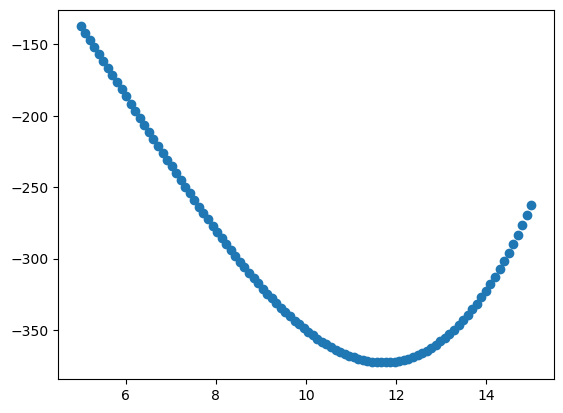

In [9]:
x = np.linspace(5, 15, 100)
y = 0.5 * x ** 3 - 9 * x ** 2 + 5*x
NOISE_STD = 3
plt.scatter(x, y)

In [10]:
# x = np.linspace(-10, 10, 100)
# y = x**2
# plt.scatter(x, y)

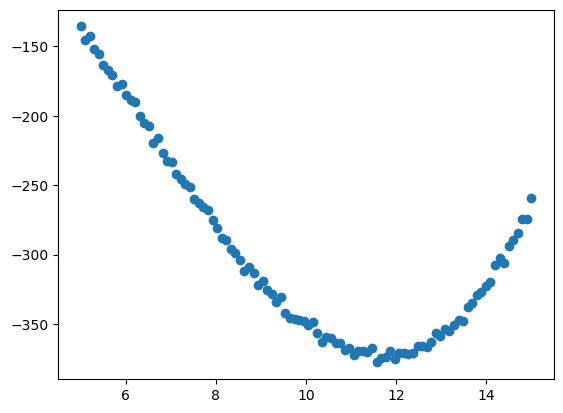

In [11]:
y_noisy = y + np.random.randn(*x.shape) * NOISE_STD
plt.scatter(x, y_noisy)

In [19]:
normalizer = layers.Normalization(
    input_shape=[
        1,
    ],
    axis=None,
)
normalizer.adapt(x)
normalizer.get_config()

2023-06-23 17:06:04.983711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-23 17:06:04.994922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


{'name': 'normalization_4',
 'trainable': True,
 'batch_input_shape': (None, 1),
 'dtype': 'float32',
 'axis': (),
 'mean': None,
 'variance': None}

In [20]:
normalizer.mean

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([10.], dtype=float32)>

In [21]:
normalizer.variance

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8.501682], dtype=float32)>

In [22]:
normalizer = layers.Normalization(
    input_shape=[
        1,
    ],
    axis=None,
)
normalizer.adapt(x)
regression_model = tf.keras.Sequential(
    [
        normalizer, 
        layers.Dense(units=1, activation="linear", input_shape=[1]),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=64, activation="relu"),
        # layers.Dense(units=10, activation="sigmoid"),
        layers.Dense(units=1, activation="linear"),
    ]
)
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error"
)

2023-06-23 17:06:05.755351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-23 17:06:05.767197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
%%time
history = regression_model.fit(
    x,
    y_noisy,
    epochs=500,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 10% of the training data.
    validation_split=0.1,
)

2023-06-23 17:06:06.842421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-23 17:06:07.076699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


CPU times: user 13.6 s, sys: 4.31 s, total: 17.9 s
Wall time: 16 s


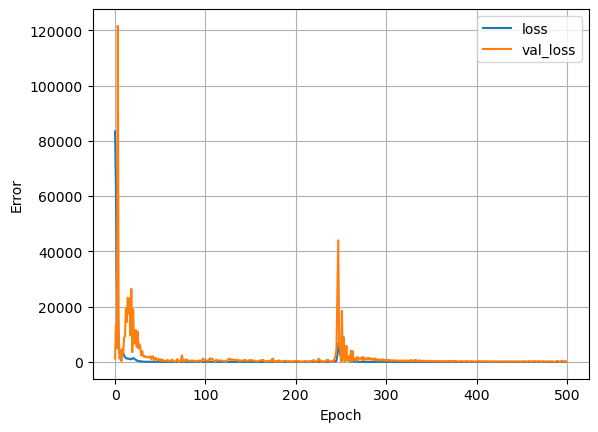

In [24]:
plot_loss(history)

4/4 [==============================] - 0s 9ms/step


2023-06-23 17:06:22.921089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


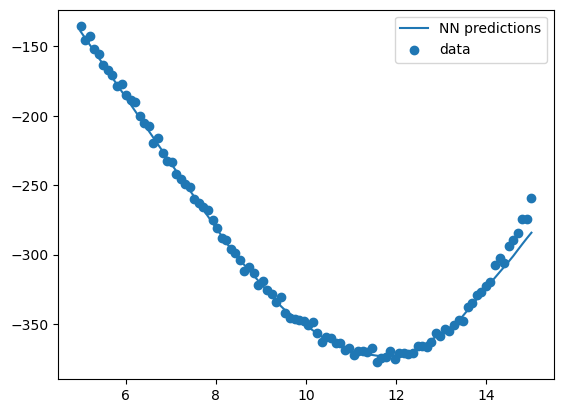

In [25]:
y_predict = regression_model.predict(x)
plt.plot(x, y_predict)
plt.scatter(x, y_noisy)
plt.legend(["NN predictions", "data"])

In [136]:
y_predict

array([[-144.27345],
       [-148.8225 ],
       [-153.37155],
       [-157.92061],
       [-162.46967],
       [-167.01872],
       [-171.56776],
       [-176.11696],
       [-180.66658],
       [-185.2162 ],
       [-189.76587],
       [-194.43214],
       [-199.25209],
       [-204.07207],
       [-208.90233],
       [-213.7428 ],
       [-218.5833 ],
       [-223.42374],
       [-227.86525],
       [-232.21788],
       [-236.5984 ],
       [-241.00691],
       [-245.41544],
       [-249.82396],
       [-254.23251],
       [-258.64105],
       [-263.04956],
       [-267.45807],
       [-271.8666 ],
       [-276.27518],
       [-280.7175 ],
       [-285.2173 ],
       [-289.7207 ],
       [-293.7738 ],
       [-297.49005],
       [-301.2063 ],
       [-304.92255],
       [-308.6388 ],
       [-312.35522],
       [-316.07578],
       [-319.79633],
       [-323.51685],
       [-327.23737],
       [-330.95792],
       [-334.69012],
       [-338.42386],
       [-341.74136],
       [-343.

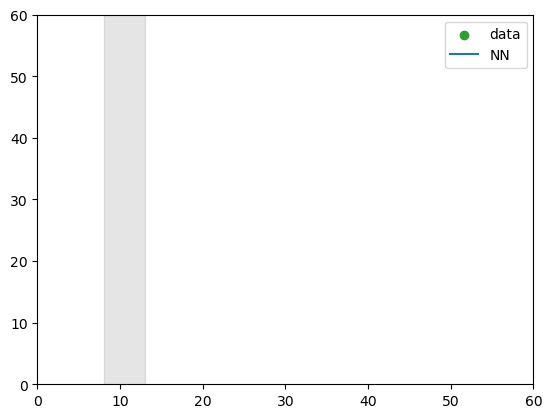

In [137]:
input_interval = interval[8, 13]
output_interval, penultimate_interval = propagate_interval(input_interval, regression_model)
plot_intervals(input_interval, output_interval, x, y_noisy, y_predict)

In [138]:
output_interval

[interval([-1286.6431789004696, 7731.808654349136])]

## Demo: Simple quadratic function

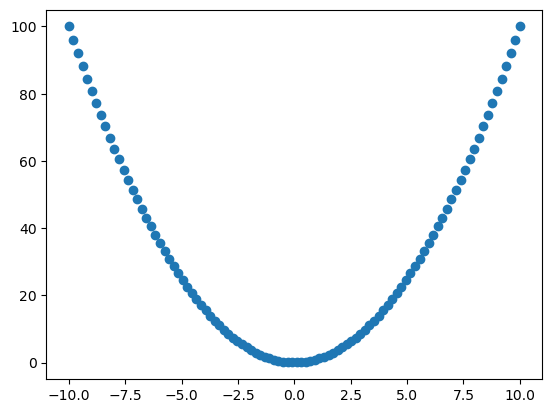

Metal device set to: Apple M1 Pro


2023-06-21 14:07:30.052896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-21 14:07:30.053029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-21 14:07:30.117151: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-21 14:07:30.165366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-21 14:07:30.177021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-21 14:07:31.097798: I tensorflow/core/grappler/o

4/4 [==============================] - 0s 50ms/step


2023-06-21 14:07:36.470174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


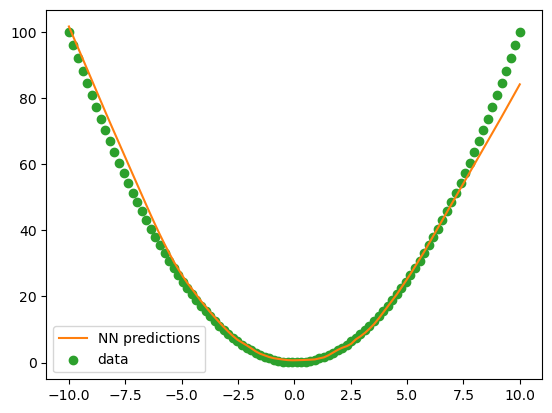

In [4]:
x = np.linspace(-10, 10, 100)
y = x**2
plt.scatter(x, y)
plt.show()

normalizer = layers.Normalization(
    input_shape=[
        1,
    ],
    axis=None,
)
normalizer.adapt(x)
regression_model = tf.keras.Sequential(
    [
        normalizer, 
        layers.Dense(units=1, activation="linear", input_shape=[1]),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=64, activation="relu"),
        # layers.Dense(units=10, activation="sigmoid"),
        layers.Dense(units=1, activation="linear"),
    ]
)
regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error"
)

history = regression_model.fit(
    x,
    y,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 10% of the training data.
    validation_split=0.1,
)

y_predict = regression_model.predict(x)
plt.plot(x, y_predict, color="C1")
plt.scatter(x, y, color="C2")
plt.legend(["NN predictions", "data"])
plt.show()

In [5]:
regression_model.predict([5.1])

1/1 [==============================] - 0s 256ms/step


array([[26.259274]], dtype=float32)

IndexError: list index out of range

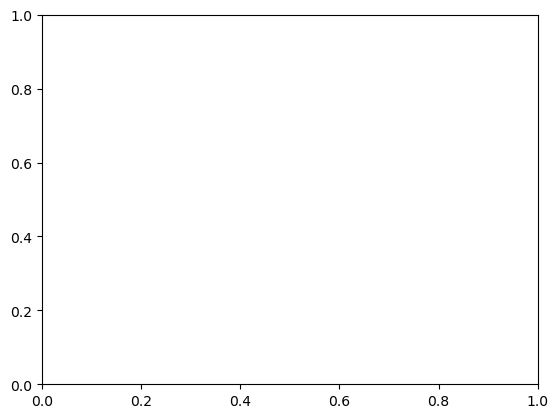

In [6]:
input_interval = interval[-8, -5]
output_interval, _ = propagate_interval(input_interval, regression_model)
plot_intervals(input_interval, output_interval, x, y, y_predict, xlim=[-10, 10], ylim=[-5, 105])

In [ ]:
output_interval

In [ ]:
input_interval = interval[1, 2]

In [ ]:
input_interval = 1

In [505]:
layers = regression_model.layers
layers

In [506]:
layer = layers[0]
layer

In [507]:
norm_mean, norm_var, _ = layer.get_weights()
norm_std = np.sqrt(norm_var)

In [508]:
norm_interval = [(input_interval - norm_mean) / norm_std]
norm_interval

[0.17148156301557785]

In [509]:
## first dense
layer = layers[1]
layer

In [510]:
weight, bias = layer.get_weights()
weight

array([[-1.3079324]], dtype=float32)

In [511]:
bias

array([-0.38841757], dtype=float32)

In [512]:
num_combinations = weight.shape[0]
num_intervals = weight.shape[1]
if num_combinations == 1 and num_intervals == 1:
    if type(norm_interval) == list:
        assert (
            len(norm_interval) == 1
        ), f"Expected only one interval, got {len(current_interval)}"
        current_interval = norm_interval[0]
    current_interval = [current_interval * float(weight) + float(bias)]

In [513]:
current_interval

[-0.612703860085968]

In [514]:
# linear activation, don't do anything
layer.get_config()["activation"]

'linear'

In [515]:
layer = layers[2]
weight, bias = layer.get_weights()
weight

array([[ 5.53364933e-01, -6.54815197e-01, -6.56215072e-01,
         5.52920550e-02, -3.23366135e-01, -4.94543195e-01,
         1.36461484e+00,  2.87311316e-01,  2.37846136e-01,
        -7.22666919e-01,  8.51673841e-01, -1.06340609e-02,
        -5.51456690e-01, -1.05066188e-01,  2.17355192e-01,
         4.57032496e-04, -5.20570755e-01, -1.18076456e+00,
        -1.51362646e+00, -6.76161349e-01,  4.40687746e-01,
        -1.70330256e-02,  1.60660952e-01, -6.10813141e-01,
         3.81981879e-02, -1.31078660e+00, -3.14615935e-01,
        -8.73416007e-01,  1.17136908e+00,  1.16198814e+00,
         2.07344472e-01, -2.61776656e-01,  2.25831404e-01,
         4.12490398e-01,  6.28763199e-01,  2.53557950e-01,
        -1.18629776e-01,  1.96111292e-01,  1.67588145e-01,
         3.80946726e-01, -6.51951969e-01,  5.53743601e-01,
        -8.92398283e-02, -2.87888229e-01, -2.13253424e-01,
         3.49539995e-01,  1.01108646e+00,  3.50805849e-01,
        -1.63587794e-01, -8.03030372e-01, -3.30389619e-0

In [516]:
bias

array([-1.1146241 , -1.2292122 , -1.2316979 , -0.8100648 , -0.7453926 ,
       -0.92983425, -0.5251688 , -0.66004634, -0.7178856 , -1.2349885 ,
       -1.2168758 , -0.9098792 , -1.0698729 , -1.0763694 , -0.69187474,
       -0.8651386 , -1.0143259 , -1.5296626 , -0.97019464, -1.1262518 ,
       -0.9903383 , -0.4686666 , -0.82293767, -1.1408186 , -0.4569568 ,
       -1.4453247 , -0.815908  , -1.3803461 , -0.92776704, -0.7253735 ,
       -0.6959139 , -0.5877921 , -0.4637546 , -1.0033581 , -1.0059334 ,
       -0.6095763 , -0.39561892, -0.78611904, -0.92681366, -1.0232527 ,
       -1.1477133 , -1.0316267 , -1.0321816 , -0.83589286, -0.6506589 ,
       -0.81177825, -1.0620822 , -0.85078335, -0.48570117, -1.2546878 ,
       -0.8179582 , -1.3889132 , -0.92291564, -0.3087277 , -0.9044249 ,
       -1.1377658 , -0.5480678 , -0.34927112,  0.16649424, -0.6698921 ,
       -1.4337294 , -1.1433983 , -1.1622066 , -0.88979155], dtype=float32)

In [517]:
num_combinations = weight.shape[0]
num_intervals = weight.shape[1]
num_combinations

1

In [518]:
num_intervals

64

In [519]:
intervals = [0] * num_intervals
for i in range(num_combinations):
    for j in range(num_intervals):
        intervals[j] += current_interval[i] * float(weight[i, j])
for j in range(num_intervals):
    intervals[j] += float(bias[j])
current_interval = intervals

In [520]:
current_interval

[-1.453672972848469,
 -0.8280043660395263,
 -0.8296324095207583,
 -0.8439424481702568,
 -0.5472649412080823,
 -0.6268257222201132,
 -1.361273559158973,
 -0.8360830911106247,
 -0.8636148591322664,
 -0.7922076400345059,
 -1.7386996417565426,
 -0.9033636774191889,
 -0.7319932136082501,
 -1.0119949460368753,
 -0.8250491074769135,
 -0.8654186159105397,
 -0.6953701461231172,
 -0.8062036078286683,
 -0.04278986529625717,
 -0.7119651482867879,
 -1.2603494084505864,
 -0.4582304125541912,
 -0.921375253027298,
 -0.7665710266844739,
 -0.48036098100225916,
 -0.6422006467877893,
 -0.6231416169018362,
 -0.8452007011158901,
 -1.6454693926581019,
 -1.4373281247788845,
 -0.8229546694778344,
 -0.427400530964263,
 -0.6021223674866321,
 -1.2560925846007625,
 -1.3911790429857627,
 -0.7649322197641252,
 -0.32293399391744926,
 -0.9062771892255927,
 -1.0294955651169397,
 -1.2566602548676653,
 -0.7482598157712905,
 -1.370907543090822,
 -0.9775040333320326,
 -0.6595026270048379,
 -0.519997709707275,
 -1.025942751

In [521]:
isinstance(current_interval[0], float)

True

In [522]:
for i in range(len(current_interval)):
    if isinstance(current_interval[0], float):
        current_interval[i] = max(current_interval[i], 0.)
    else:
        current_interval[i] &= interval[0, inf]
        if current_interval[i] == interval():
            current_interval[i] = interval[0, 0]

In [523]:
current_interval

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [524]:
layer = layers[3]
weight, bias = layer.get_weights()
num_combinations = weight.shape[0]
num_intervals = weight.shape[1]

intervals = [0] * num_intervals
for i in range(num_combinations):
    for j in range(num_intervals):
        intervals[j] += current_interval[i] * float(weight[i, j])
for j in range(num_intervals):
    intervals[j] += float(bias[j])
current_interval = intervals

In [525]:
current_interval

[-0.6005544662475586,
 -0.5531374216079712,
 -0.3369157910346985,
 -0.13380569219589233,
 -0.6005500555038452,
 -0.6005547642707825,
 -0.6005547642707825,
 -0.6005548238754272,
 -0.3661317825317383,
 -0.5313845872879028,
 -0.4827796220779419,
 -0.5381146669387817,
 -0.6005526185035706,
 -0.6005522608757019,
 -0.6005527973175049,
 -0.2658362090587616,
 -0.0031479354947805405,
 -0.5010706186294556,
 -0.6005548238754272,
 -0.600554347038269,
 -0.22846491634845734,
 -0.6005532145500183,
 -0.573142409324646,
 -0.6005548238754272,
 -0.19556251168251038,
 -0.30964195728302,
 -0.6005548238754272,
 -0.6005548238754272,
 -0.6236506700515747,
 -0.3306633234024048,
 -0.36600184440612793,
 -0.534702479839325,
 -0.5097086429595947,
 -0.2718375325202942,
 -0.6005547642707825,
 1.8613003492355347,
 -0.514345109462738,
 -0.600553572177887,
 -0.600554883480072,
 -0.0023048827424645424,
 -0.006488699931651354,
 -0.6416646242141724,
 -0.24102289974689484,
 -0.0011000281665474176,
 -0.23126213252544403,
 0

In [526]:
for i in range(len(current_interval)):
    if isinstance(current_interval[0], float):
        current_interval[i] = max(current_interval[i], 0.)
    else:
        current_interval[i] &= interval[0, inf]
        if current_interval[i] == interval():
            current_interval[i] = interval[0, 0]

In [527]:
layer = layers[4]
weight, bias = layer.get_weights()
num_combinations = weight.shape[0]
num_intervals = weight.shape[1]

intervals = [0] * num_intervals
for i in range(num_combinations):
    for j in range(num_intervals):
        intervals[j] += current_interval[i] * float(weight[i, j])
for j in range(num_intervals):
    intervals[j] += float(bias[j])
current_interval = intervals
current_interval

[-1.2181422648293698,
 -0.5077909740952191,
 -1.7467534384942467,
 -0.7353968391215284,
 -0.5693606547903096,
 -0.927321301824962,
 -0.6705740563172446,
 -1.5494473587101416,
 -0.632691319076629,
 -0.3461941851763728,
 0.013129077763349706,
 -0.910552749897402,
 -0.4402778449839031,
 -0.11347651013322632,
 -0.6461128052759149,
 -0.4077931659323899,
 -0.023888789249949305,
 -0.26867887717518313,
 -0.6678681836302971,
 -0.2925771696273698,
 -0.9971620712322029,
 -0.3805759809008018,
 -0.9271697517700568,
 -1.4318948762889407,
 0.02921149209836149,
 -0.7089079188022005,
 -1.0567346969738103,
 0.017479195205606146,
 -0.7875900046086959,
 -0.06027193502120998,
 -0.9018098269963373,
 -0.9005298109227957,
 -0.12790881387209885,
 -0.27025057805734054,
 -0.7202427687305613,
 -0.2375375085563629,
 -0.10229992141649352,
 -0.2568461158405704,
 -0.5600013254342855,
 -0.21642006860300667,
 0.061710709394000585,
 -0.606840548989628,
 -1.0495606689802948,
 -0.2445340496653694,
 -0.8802773702762812,
 0

In [529]:
for i in range(len(current_interval)):
    if isinstance(current_interval[0], float):
        current_interval[i] = max(current_interval[i], 0.)
    else:
        current_interval[i] &= interval[0, inf]
        if current_interval[i] == interval():
            current_interval[i] = interval[0, 0]

In [530]:
layer = layers[5]
weight, bias = layer.get_weights()
num_combinations = weight.shape[0]
num_intervals = weight.shape[1]

intervals = [0] * num_intervals
for i in range(num_combinations):
    for j in range(num_intervals):
        intervals[j] += current_interval[i] * float(weight[i, j])
for j in range(num_intervals):
    intervals[j] += float(bias[j])
current_interval = intervals
current_interval

[0.4841068435002094]